# Relatório

- Nome: Heloísa Fernanda Ferreira Jorge
- Matricula: 00000845226

## Importando Bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import sklearn as sk

# Importacões do sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 

# Importacões do tensorflow

#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Parte 1

### Importando os dados

In [69]:
# Carregando os dados do dataset "Boston Housing"

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(url, header=None, names=column_names)

In [70]:
# Exibindo os dados

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Análise de dados

Segundo a base de dados oficial, existem 14 colunas, cada coluna apresenta o seguinte significado:

- CRIM: per capita crime rate by town

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000's

(Referência: https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset)

In [4]:
# Verificando a presença de dados ausentes em formato NaN ou se null

print(f"Quantidade de valores NaN e nulos no dataset: {data.isnull().values.sum()}")

Quantidade de valores NaN e nulos no dataset: 0


In [35]:
# Criação de boxplots para verificar a existência de outliers nos dados

def createBoxPlot(maxC, maxR, data, column_names):
    fig, axs = plt.subplots(ncols=maxC, nrows=maxR, figsize=(18, 12))

    name = 0
    for i in range(0, maxR):
        for j in range(0, maxC):
            v = column_names[name]
            axs[i, j].boxplot(data[v])
            axs[i, j].set_title(v)
            name += 1

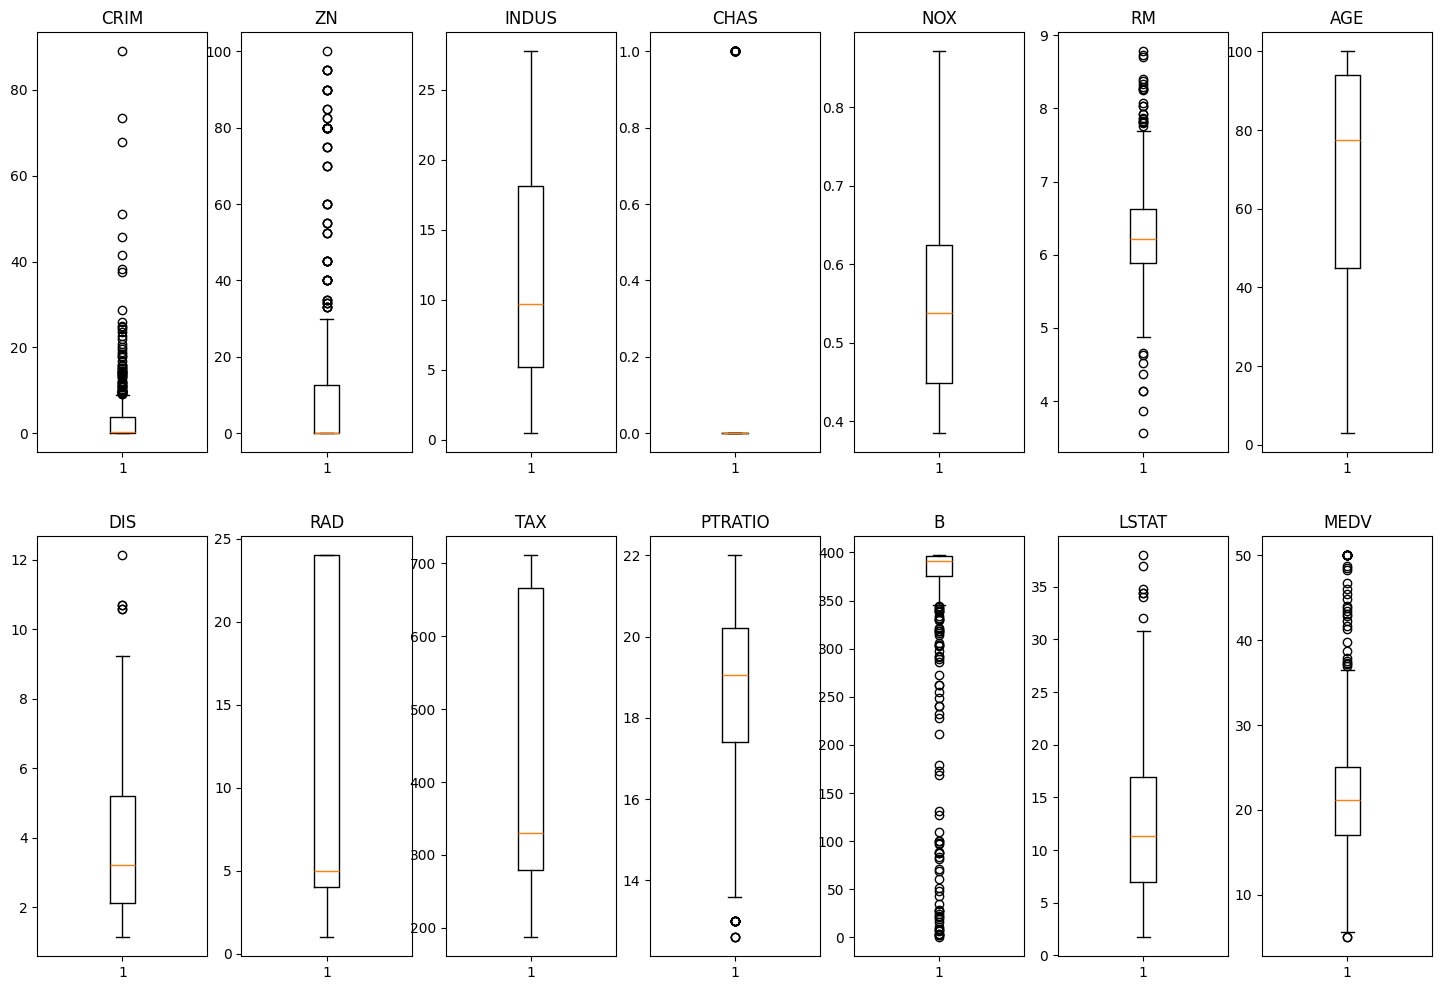

In [36]:
createBoxPlot(7, 2, data, column_names)

In [75]:
# Criação de um heatmap para ver a correlação dos dados com cada variável

def create_heatmap(data, columns):
    fig, ax = plt.subplots(figsize=(8, 8))
    data_corr = data.corr().abs().round(1)

    ax.imshow(data_corr)

    ticks = np.arange(len(columns))
    ax.set_xticks(ticks, columns, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(ticks, columns)

    for i in range(0, len(data_corr)):
        for j in range(0, len(data_corr)):
            plt.annotate(str(data_corr.iloc[i, j]), xy=(i, j) , ha='center', va='center', color='w')

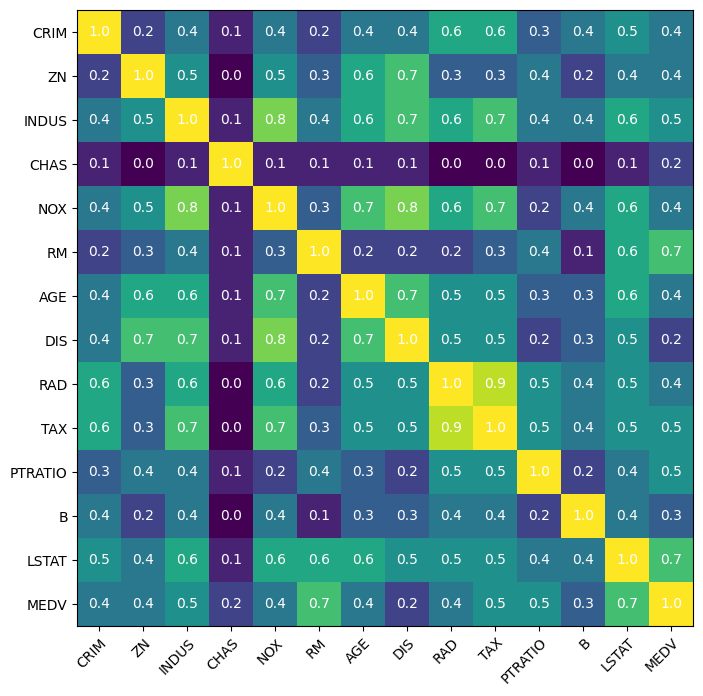

In [76]:
create_heatmap(data, column_names)

### Escolhendo uma variável preditora

In [ ]:
# A variável preditora escolhida foi NOX

X = data[['NOX']].to_numpy()
y = data['MEDV'].to_numpy()

In [7]:
# Mostrando o estrutura de X com a coluna NOX

X.shape

(506, 1)

In [8]:
# Mostrando a estrutura de y com a coluna MEDV

y.shape

(506,)

In [ ]:
# Divisão entre dados de teste (20%) e treinamento (80%) 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
print(f"Quantidade de dados de treinamento: {len(X_train)}")
print(f"Quantidade de dados de teste: {len(X_test)}")

Quantidade de dados de treinamento: (404, 1)
Quantidade de dados de teste: (102, 1)


### Treinamento de um modelo de regressão linear

In [11]:
# Criação do modelo linear e treinamento

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Valores de W (w1 e w0), em que h(x) = w1 * x + w0

w1 = linear_model.coef_
w0 = linear_model.intercept_

print(f"W => [w1 = {w1}, w0 = {w0}]")

W => [w1 = [-32.96398015], w0 = 41.140467403817695]


In [13]:
# Valores de y resultantes dos dados de teste

y_pred_linear = linear_model.predict(X_test)
y_pred_linear

array([24.32883753, 26.40556828, 21.06540349, 27.5263436 , 17.63714956,
       26.73520808, 23.2080622 , 20.57094379, 23.60362997, 21.85653902,
       23.01027832, 23.86734181, 18.29642916, 26.73520808, 24.88922519,
       20.90058359, 21.98839494, 18.0656813 , 27.22966778, 17.63714956,
       25.84518062, 26.40556828, 23.40584608, 22.25210678, 17.47232966,
       21.889503  , 26.73520808, 17.63714956, 25.02108111, 21.85653902,
       24.32883753, 24.88922519, 19.02163672, 15.75820269, 21.889503  ,
       12.4288407 , 25.68036071, 24.16401763, 25.02108111, 27.5263436 ,
       21.85653902, 25.58146877, 27.42415526, 27.65819952, 25.02108111,
       18.0656813 , 23.40584608, 27.5263436 , 22.02135892, 23.40584608,
       23.86734181, 26.5407206 , 23.40584608, 23.99919773, 22.18617882,
       21.92246698, 16.74712209, 27.59227156, 26.33964032, 26.93299196,
       26.2077844 , 27.8559834 , 24.52662141, 23.40584608, 27.59227156,
       25.02108111, 18.29642916, 27.09781186, 27.0318839 , 17.63

In [14]:
# Valores de y_test

y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [15]:
# Criação de uma função para o cálculo do mean_absolute_error(MAE) e mean_squared_error(MSE)

def printMetricas(modelo, y_pred):
    print(f"Resultados da {modelo}:")
    print(f"MAE = {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
    

In [16]:
printMetricas("Regressão Linear", y_pred_linear)

Resultados da Regressão Linear:
MAE = 5.70
MSE = 58.29


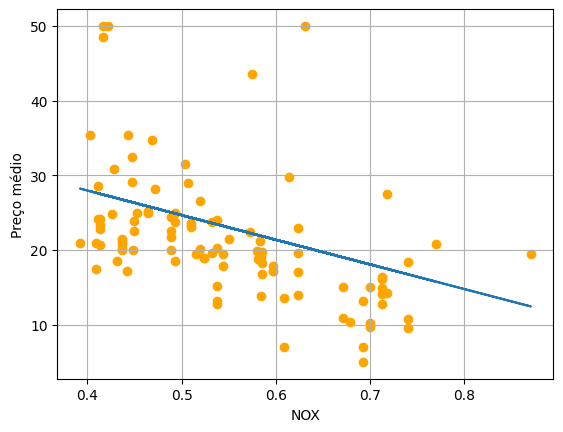

In [17]:
# Ilustrando os data points de teste e o resultado da regressão linear

plt.scatter(X_test, y_test, c='orange')
plt.plot(X_test, y_pred_linear)
plt.xlabel("NOX")
plt.ylabel("Preço médio")
plt.grid()

### Treinamento de um modelo de rede neural

In [18]:
# Criação do modelo de rede neural com 10 neurônios no hidden layer, 1 neurônio de entrada e 1 neurônio de saída

nn_model = Sequential([
Dense(10, activation='relu', input_shape=(1,)),
Dense(1, activation='linear')
])

c:\Users\heloi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compilação do modelo

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
# Treinamento do modelo por 50 épocas e com batch de tamanho 15

nn_model.fit(X_train, y_train, epochs=50, batch_size=15, verbose=1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 590.5269 - mae: 22.4860
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 592.0325 - mae: 22.6372 
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 591.0604 - mae: 22.4478 
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 576.2819 - mae: 22.1669 
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 597.5159 - mae: 22.4529 
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 605.4994 - mae: 22.5980 
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 585.1466 - mae: 22.1597 
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 580.5615 - mae: 22.0963 
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 555.7493 - mae: 21.6498 
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 518.8337 - mae: 20.9530 
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 480.6010 - mae: 19.9802 
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 516.1180 - mae: 20.8440 
Ep

In [21]:
# Mostrando os dados de treinamento para o modelo e pedindo para que ele determine o valor de y

y_pred_nn = nn_model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [22]:
# Utilização da função criada no tópico de criação de um modelo linear para determinar o MAE e o MSE do modelo

printMetricas("Rede Neural", y_pred_nn)

Resultados da Rede Neural:
MAE = 6.98
MSE = 96.09


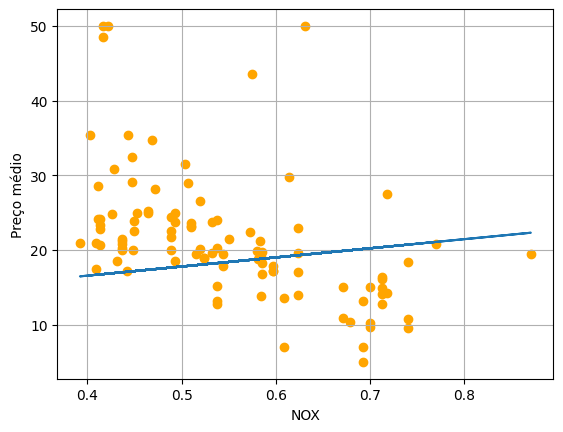

In [23]:
# Ilustrando os resultados da rede neural nos dados de teste

plt.scatter(X_test, y_test, c='orange')
plt.plot(X_test, y_pred_nn)
plt.xlabel("NOX")
plt.ylabel("Preço médio")
plt.grid()

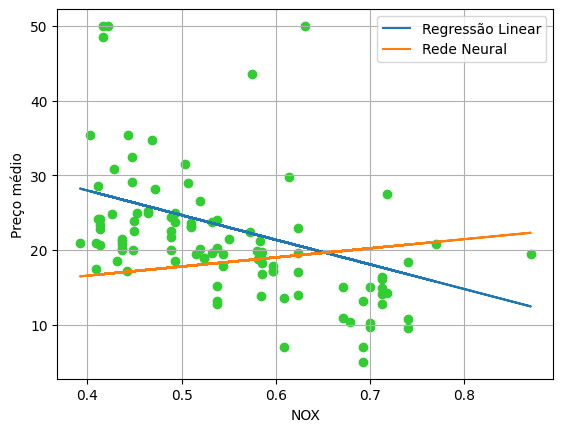

In [24]:
plt.scatter(X_test, y_test, c='#32CD32')
plt.plot(X_test, y_pred_linear, label="Regressão Linear")
plt.plot(X_test, y_pred_nn, label="Rede Neural")
plt.xlabel("NOX")
plt.ylabel("Preço médio")
plt.grid()
plt.legend()

## Parte 2

### Importando os dados

In [78]:
# Carregando os dados do dataset "Pima Indians Diabetes"

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", 
"Outcome"]
data = pd.read_csv(url, header=None, names=columns)

In [79]:
# Exibindo os dados

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Análise dos dados

Segundo a base de dados oficial, existem 9 colunas, cada coluna apresenta o seguinte significado:

- Pregnancies: Number of times pregnant

- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

(Referência: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [39]:
# Verificando a presença de dados ausentes em formato NaN ou se null

print(f"Quantidade de valores NaN e nulos no dataset: {data.isnull().values.sum()}")

Quantidade de valores NaN e nulos no dataset: 0


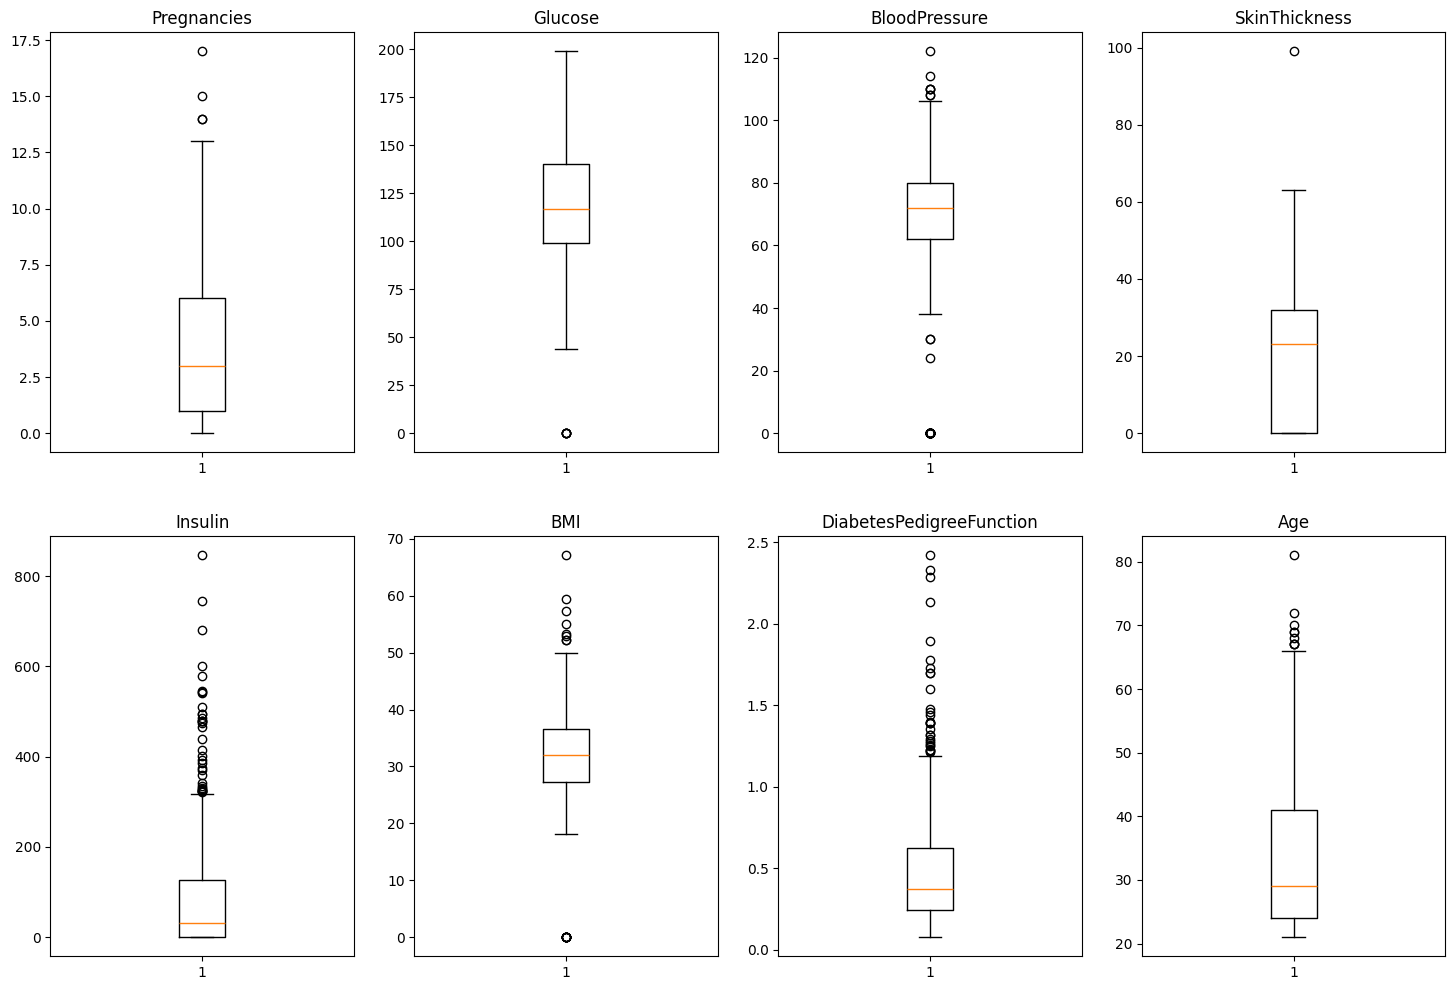

In [ ]:
# Utilização da função da Parte 1 para criação de boxplots (menos a coluna Outcome)

createBoxPlot(4, 2, data, columns)

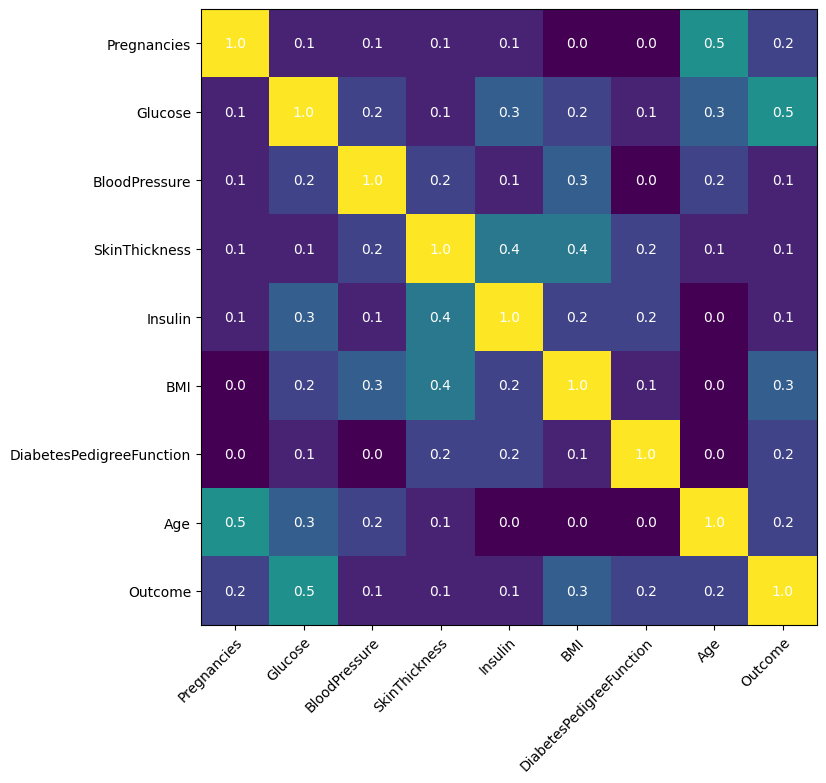

In [80]:
create_heatmap(data, columns)

### Escolhendo uma variável preditora

In [4]:
# A variável preditora escolhida foi BloodPressure 

X = data[['BMI']].to_numpy()
y = data['Outcome'].to_numpy()

In [5]:
# Mostrando o estrutura de X com a coluna BloodPressure

X.shape

(768, 1)

In [6]:
# Mostrando a estrutura de y com a coluna Outcome

y.shape

(768,)

In [7]:
# Divisão entre dados de teste (30%) e treinamento (70%)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=21)

In [8]:
# Quantidade de dados de treinamento e de teste

print(f"Quantidade de dados de treinamento: {len(X_train)}")
print(f"Quantidade de dados de teste: {len(X_test)}")

Quantidade de dados de treinamento: 537
Quantidade de dados de teste: 231


### Treinando um modelo de regressão logística

In [9]:
# Criação do modelo de regressão logística e treinamento

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Valores de W (w1 e w0), em que h(x) = w1 * x + w0

w1 = log_model.coef_
w0 = log_model.intercept_

print(f"W => [w1 = {w1}, w0 = {w0}]")

W => [w1 = [[0.10239134]], w0 = [-4.06502441]]


In [11]:
# Valores de y resultantes ao pedir pra ele prever com base nos valores de X_test 

y_pred_log = log_model.predict(X_test)
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [12]:
# Valores do y_test

y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1])

### Treinamento de um modelo de rede neural

In [ ]:
# Criação e compilação de um modelo de rede neural
# Conforme fui testando, percebi que o modelo estava ficando com overfitting e a precisão estava zerada
# Para resolver isso tentei simplificar o modelo e diminuir a quantidade de épocas, mas ainda não está muito bom o desempenho, talvez precise de regularização

nn_model = Sequential([ 
Dense(2, activation='relu', input_shape=(1,)), 
Dense(2, activation='relu'), 
Dense(1, activation='sigmoid') 
])

nn_model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy', 'precision']) 

c:\Users\heloi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Treinamento do modelo de rede neural

nn_model.fit(X_train, y_train, epochs=12, batch_size=100, verbose=1) 

Epoch 1/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.3549 - loss: 16.6369 - precision: 0.3484
Epoch 2/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3660 - loss: 16.1035 - precision: 0.3548 
Epoch 3/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3643 - loss: 15.7787 - precision: 0.3588
Epoch 4/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3396 - loss: 16.0144 - precision: 0.3323 
Epoch 5/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3507 - loss: 15.1767 - precision: 0.3444 
Epoch 6/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3393 - loss: 15.0788 - precision: 0.3324
Epoch 7/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3369 - loss: 14.7453 - precision: 0.3263
Epoch 8/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3338 - loss: 14.4355 - precision: 0.3281
Epoch 9/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3337 - loss: 14.0209 - precision: 0.3233 
Epoch 10/12
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy

In [15]:
# Mostrando os dados de treinamento para o modelo e pedindo para que ele determine o valor de y para esses dados
# Os valores de y resultantes são do intervalo [0, 1], então é preciso arredondar y

y_pred_nn = nn_model.predict(X_test).round()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


### Avaliando os modelos

In [17]:
# Criando uma função para mostrar os resultados das métricas de accuracy, precision, recall e F1-Score

def resultadosMetricas(modelo, y_pred):
    print(f"{modelo}:") 
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}") 
    print(f"Precision: {precision_score(y_test, y_pred):.2f}") 
    print(f"Recall: {recall_score(y_test, y_pred):.2f}") 
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}") 

In [18]:
# Resultados da regressão logística

resultadosMetricas("Regressão Logística", y_pred_log)

Regressão Logística:
Accuracy: 0.62
Precision: 0.50
Recall: 0.18
F1-Score: 0.27


In [19]:
# Resultados da rede neural

resultadosMetricas("Rede Neural", y_pred_nn)

Rede Neural:
Accuracy: 0.38
Precision: 0.38
Recall: 0.99
F1-Score: 0.55


### Curva ROC e cálculo do AUC

In [27]:
def curvaROC(modelo,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
    plt.plot(fpr, tpr, label=f"{modelo} (AUC = {roc_auc_score(y_test, y_pred):.2f})") 
    plt.xlabel('Taxa de Falsos Positivos') 
    plt.ylabel('Taxa de Verdadeiros Positivos') 
    plt.title('Curva ROC') 
    plt.legend() 

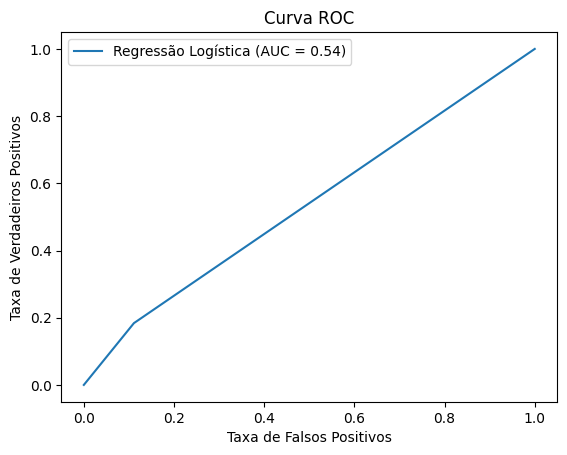

In [28]:
curvaROC("Regressão Logística", y_pred_log)

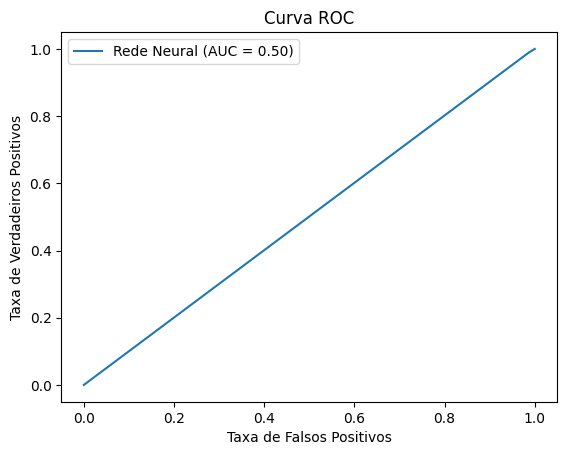

In [29]:
curvaROC("Rede Neural", y_pred_nn)

Infelizmente os dois modelos estão com um desempenho muito ruim, acredito que tenho que alterar o learning rate dos modelos 